## **EDA - ¿LA GENERACIÓN OLVIDADA DEL TENIS?**

En el mundo del tenis, se conoce a la generación de 1990 como la "generación olvidada", ya que solamente dos jugadores nacidos en ese período ganaron un Grand Slam (la categoría de torneo más prestigiosa): ellos son Daniil Medvédev y Dominic Thiem. En este EDA, utilizaré Python como lenguaje principal y sus herramientas de análisis de datos para extraer información que explique la razón por la que muchos jugadores de los 90 no pudieron triunfar.

## **PARTE 1:** CARGA Y LIMPIEZA DE DATASETS

In [76]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

%matplotlib inline

partidos = pd.read_csv("./data/atp_matches_till_2022.csv", sep=',')
fuente_1 = "https://www.kaggle.com/datasets/sijovm/atpdata"

jugadores = pd.read_csv("./data/atp_players_till_2022.csv", sep=',')
fuente_2 = "https://github.com/JeffSackmann/tennis_atp"

df_4 = pd.read_csv("./data/atp_tennis.csv", sep=',')
fuente_4 = "https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull"

Obtengo la información general de dataset "partidos", que contiene partidos disputados desde 1968 hasta 2022, de "jugadores", que tiene nombre, apellido y nacimiento, entre otros, y de df_4, que tiene todos los partidos de 2000 hasta la actualidad.

In [77]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188161 entries, 0 to 188160
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188161 non-null  object 
 1   tourney_name        188161 non-null  object 
 2   surface             185844 non-null  object 
 3   draw_size           188161 non-null  int64  
 4   tourney_level       188161 non-null  object 
 5   tourney_date        188161 non-null  int64  
 6   match_num           188161 non-null  int64  
 7   winner_id           188161 non-null  int64  
 8   winner_seed         69694 non-null   float64
 9   winner_entry        16270 non-null   object 
 10  winner_name         188161 non-null  object 
 11  winner_hand         188144 non-null  object 
 12  winner_ht           171924 non-null  float64
 13  winner_ioc          188151 non-null  object 
 14  winner_age          186826 non-null  float64
 15  loser_id            188161 non-nul

In [78]:
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58687 entries, 0 to 58686
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    58687 non-null  int64  
 1   name_first   58332 non-null  object 
 2   name_last    58646 non-null  object 
 3   hand         58447 non-null  object 
 4   dob          45140 non-null  float64
 5   ioc          58586 non-null  object 
 6   height       2788 non-null   float64
 7   wikidata_id  4894 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


In [79]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66338 entries, 0 to 66337
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  66338 non-null  object 
 1   Date        66338 non-null  object 
 2   Series      66338 non-null  object 
 3   Court       66338 non-null  object 
 4   Surface     66338 non-null  object 
 5   Round       66338 non-null  object 
 6   Best of     66338 non-null  int64  
 7   Player_1    66338 non-null  object 
 8   Player_2    66338 non-null  object 
 9   Winner      66338 non-null  object 
 10  Rank_1      66338 non-null  int64  
 11  Rank_2      66338 non-null  int64  
 12  Pts_1       66338 non-null  int64  
 13  Pts_2       66338 non-null  int64  
 14  Odd_1       66338 non-null  float64
 15  Odd_2       66338 non-null  float64
 16  Score       66338 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


Visualizo las cinco primeras filas de ambos DF.

In [80]:
partidos.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
jugadores.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [82]:
df_4.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


Renombro columnas de "id" y "dob" del DF "jugadores" para hacer merge con tabla de partidos y tener la fecha de nacimiento de los "winners"

In [83]:
jugadores = jugadores.rename(columns={"player_id": "winner_id", "dob": "winner_dob"})
partidos = partidos.merge(
    jugadores[["winner_id", "winner_dob"]],
    on="winner_id",
    how="left"
)
partidos

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner_dob
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930829.0
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19440222.0
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19470319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,4,209362,NaN,NaN,...,42.0,12.0,10.0,11.0,13.0,1103.0,9.0,1130.0,8.0,20010407.0
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,5,202065,NaN,NaN,...,40.0,20.0,15.0,4.0,8.0,808.0,23.0,1390.0,4.0,20000727.0
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NaN,NaN,...,29.0,8.0,11.0,6.0,10.0,1059.0,10.0,1881.0,1.0,19980830.0
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NaN,NaN,...,24.0,7.0,10.0,5.0,9.0,NaN,NaN,NaN,NaN,20040606.0


Repito el proceso para obtener la fecha de nacimiento de los perdedores.

In [84]:
jugadores = jugadores.rename(columns={"winner_id": "loser_id", "winner_dob": "loser_dob"})
partidos = partidos.merge(
    jugadores[["loser_id", "loser_dob"]],
    on="loser_id",
    how="left"
)
partidos

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,winner_dob,loser_dob
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19440703.0
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930829.0,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19440222.0,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19470319.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,4,209362,NaN,NaN,...,12.0,10.0,11.0,13.0,1103.0,9.0,1130.0,8.0,20010407.0,20011126.0
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,5,202065,NaN,NaN,...,20.0,15.0,4.0,8.0,808.0,23.0,1390.0,4.0,20000727.0,19940123.0
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NaN,NaN,...,8.0,11.0,6.0,10.0,1059.0,10.0,1881.0,1.0,19980830.0,19890125.0
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NaN,NaN,...,7.0,10.0,5.0,9.0,NaN,NaN,NaN,NaN,20040606.0,20000616.0


Devuelvo el nombre original a las columnas de jugadores

In [85]:
jugadores = jugadores.rename(columns={"loser_id":"player_id", "loser_dob":"dob"})
jugadores

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554
...,...,...,...,...,...,...,...,...
58682,212032,Abhishek,Bastola,U,NaN,NPL,NaN,NaN
58683,212033,Cameron,Muller,U,NaN,USA,NaN,NaN
58684,212034,Ian,Bracks,U,NaN,USA,NaN,NaN
58685,212035,Alexander,Visser,U,NaN,USA,NaN,NaN


Elimino columnas que no me sirven para el análisis que tengo en mente.

In [86]:
partidos.drop(['tourney_id', 'draw_size', 'match_num', 'winner_entry', 'winner_hand', 'winner_ht', 'loser_entry',
                "loser_hand", 'score', 'best_of', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
                 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
                  'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
                  'winner_seed', 'loser_seed', 'loser_ht', 'minutes', 'winner_rank'], axis=1, inplace=True)

partidos.reset_index(drop=True, inplace=True)

Filtro el DF solamente con las finales de los Grand Slams y lo asigno a una variable.

In [87]:
grand_slams = partidos[partidos["tourney_level"]=="G"]
grand_slams_finales = grand_slams[(grand_slams["round"] == "F")]

grand_slams_finales

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob
495,Roland Garros,Clay,G,19680527,100016,Ken Rosewall,AUS,33.5,100029,Rod Laver,AUS,29.7,F,19341102.0,19380809.0
742,Wimbledon,Grass,G,19680624,100029,Rod Laver,AUS,29.8,100100,Tony Roche,AUS,23.1,F,19380809.0,19450517.0
837,US Open,Grass,G,19680829,100074,Arthur Ashe,USA,25.1,100084,Tom Okker,NED,24.5,F,19430710.0,19440222.0
993,Australian Chps.,Grass,G,19680119,100079,Bill Bowrey,AUS,24.0,100064,Juan Gisbert,ESP,25.7,F,19431225.0,19420405.0
4928,Roland Garros,Clay,G,19690528,100029,Rod Laver,AUS,30.8,100016,Ken Rosewall,AUS,34.5,F,19380809.0,19341102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184443,Australian Open,Hard,G,20210208,104925,Novak Djokovic,SRB,33.7,106421,Daniil Medvedev,RUS,24.9,F,19870522.0,19960211.0
185532,Australian Open,Hard,G,20220117,104745,Rafael Nadal,ESP,35.6,106421,Daniil Medvedev,RUS,25.9,F,19860603.0,19960211.0
186617,Roland Garros,Clay,G,20220523,104745,Rafael Nadal,ESP,35.9,134770,Casper Ruud,NOR,23.4,F,19860603.0,19981222.0
186914,Wimbledon,Grass,G,20220627,104925,Novak Djokovic,SRB,35.0,106401,Nick Kyrgios,AUS,27.1,F,19870522.0,19950427.0


Compruebo si hay valores nulos en las columnas de la fecha de nacimiento.

In [88]:
grand_slams_finales['winner_dob'].isnull().sum()

np.int64(0)

In [89]:
grand_slams_finales['loser_dob'].isnull().sum()

np.int64(0)

El tercer dataset contiene datos actualizados hasta 2025, así que lo limpio para luego concatenar.

In [90]:
#Convierto columna Date a formato Fecha y extraigo el año en una columna nueva
df_4['Date'] = pd.to_datetime(df_4['Date'])
df_4['Año'] = df_4['Date'].dt.year

#Reemplazo "French Open" por "Roland Garros" para unificar
df_4["Tournament"] = df_4["Tournament"].replace("French Open","Roland Garros")

#Elimino columnas que no me sirven
df_4.drop(['Best of','Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score'], axis=1, inplace=True)

df_4.reset_index(drop=True, inplace=True)

Filtro el dataset con las finales que me hacían falta (de 2023 a 2025) y lo asigno a una nueva variable

In [91]:
#dejo df limpio
gs_finales_2023_25 = df_4[(df_4["Round"] == "The Final") & (df_4["Series"] == "Grand Slam") & (df_4["Año"] > 2022)]
gs_finales_2023_25.reset_index(drop=True, inplace=True)
gs_finales_2023_25

,Tournament,Date,Series,Court,Surface,Round,Player_1,Player_2,Winner,Rank_1,Rank_2,Año
0,Australian Open,2023-01-29,Grand Slam,Outdoor,Hard,The Final,Tsitsipas S.,Djokovic N.,Djokovic N.,4,5,2023
1,Roland Garros,2023-06-11,Grand Slam,Outdoor,Clay,The Final,Djokovic N.,Ruud C.,Djokovic N.,3,4,2023
2,Wimbledon,2023-07-16,Grand Slam,Outdoor,Grass,The Final,Djokovic N.,Alcaraz C.,Alcaraz C.,2,1,2023
3,US Open,2023-09-10,Grand Slam,Outdoor,Hard,The Final,Djokovic N.,Medvedev D.,Djokovic N.,2,3,2023
4,Australian Open,2024-01-28,Grand Slam,Outdoor,Hard,The Final,Medvedev D.,Sinner J.,Sinner J.,3,4,2024
5,Roland Garros,2024-06-09,Grand Slam,Outdoor,Clay,The Final,Zverev A.,Alcaraz C.,Alcaraz C.,4,3,2024
6,Wimbledon,2024-07-14,Grand Slam,Outdoor,Grass,The Final,Djokovic N.,Alcaraz C.,Alcaraz C.,2,3,2024
7,US Open,2024-09-08,Grand Slam,Outdoor,Hard,The Final,Fritz T.,Sinner J.,Sinner J.,12,1,2024
8,Australian Open,2025-01-26,Grand Slam,Outdoor,Hard,The Final,Sinner J.,Zverev A.,Sinner J.,1,2,2025
9,Roland Garros,2025-06-08,Grand Slam,Outdoor,Clay,The Final,Alcaraz C.,Sinner J.,Alcaraz C.,2,1,2025


Con inteligencia artificial, transformé las 12 líneas de "gs_finales_2023_25" al formato de "grand_slams_finales" 

In [92]:
finales_2023_2025 = pd.read_csv("./data/finales_2023_2025.csv", sep=',')
finales_2023_2025

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob
0,Australian Open,Hard,G,20230129,104925,Novak Djokovic,SRB,35.7,207690,Stefanos Tsitsipas,GRE,24.5,F,19870522.0,19980812.0
1,Roland Garros,Clay,G,20230611,104925,Novak Djokovic,SRB,36.1,207574,Casper Ruud,NOR,24.5,F,19870522.0,19981222.0
2,Wimbledon,Grass,G,20230716,207989,Carlos Alcaraz,ESP,20.2,104925,Novak Djokovic,SRB,36.1,F,20030505.0,19870522.0
3,US Open,Hard,G,20230910,104925,Novak Djokovic,SRB,36.3,206643,Daniil Medvedev,RUS,27.6,F,19870522.0,19960211.0
4,Australian Open,Hard,G,20240128,207876,Jannik Sinner,ITA,22.5,206643,Daniil Medvedev,RUS,27.9,F,20010816.0,19960211.0
5,Roland Garros,Clay,G,20240609,207989,Carlos Alcaraz,ESP,21.1,207434,Alexander Zverev,GER,27.1,F,20030505.0,19970420.0
6,Wimbledon,Grass,G,20240714,207989,Carlos Alcaraz,ESP,21.2,104925,Novak Djokovic,SRB,37.1,F,20030505.0,19870522.0
7,US Open,Hard,G,20240908,207876,Jannik Sinner,ITA,23.1,207684,Taylor Fritz,USA,26.9,F,20010816.0,19971028.0
8,Australian Open,Hard,G,20250126,207876,Jannik Sinner,ITA,23.4,207434,Alexander Zverev,GER,27.8,F,20010816.0,19970420.0
9,Roland Garros,Clay,G,20250608,207989,Carlos Alcaraz,ESP,22.1,207876,Jannik Sinner,ITA,23.8,F,20030505.0,20010816.0


Concateno ambos para obtener un DF con todas las finales disputadas de la Era Abierta.

In [93]:
gs_finales_limpio = pd.concat([grand_slams_finales, finales_2023_2025], axis=0)
gs_finales_limpio

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob
495,Roland Garros,Clay,G,19680527,100016,Ken Rosewall,AUS,33.5,100029,Rod Laver,AUS,29.7,F,19341102.0,19380809.0
742,Wimbledon,Grass,G,19680624,100029,Rod Laver,AUS,29.8,100100,Tony Roche,AUS,23.1,F,19380809.0,19450517.0
837,US Open,Grass,G,19680829,100074,Arthur Ashe,USA,25.1,100084,Tom Okker,NED,24.5,F,19430710.0,19440222.0
993,Australian Chps.,Grass,G,19680119,100079,Bill Bowrey,AUS,24.0,100064,Juan Gisbert,ESP,25.7,F,19431225.0,19420405.0
4928,Roland Garros,Clay,G,19690528,100029,Rod Laver,AUS,30.8,100016,Ken Rosewall,AUS,34.5,F,19380809.0,19341102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,US Open,Hard,G,20240908,207876,Jannik Sinner,ITA,23.1,207684,Taylor Fritz,USA,26.9,F,20010816.0,19971028.0
8,Australian Open,Hard,G,20250126,207876,Jannik Sinner,ITA,23.4,207434,Alexander Zverev,GER,27.8,F,20010816.0,19970420.0
9,Roland Garros,Clay,G,20250608,207989,Carlos Alcaraz,ESP,22.1,207876,Jannik Sinner,ITA,23.8,F,20030505.0,20010816.0
10,Wimbledon,Grass,G,20250713,207876,Jannik Sinner,ITA,23.9,207989,Carlos Alcaraz,ESP,22.2,F,20010816.0,20030505.0


Aplico mismo método para extraer el año del torneo y de los nacimientos de los ganadores y perdedores. A estos dos últimos les aplico un cálculo matemático para obtener la década en la que nacieron.

In [94]:
gs_finales_limpio["tourney_year"] = gs_finales_limpio["tourney_date"].astype(str).str[:4].astype(int)
gs_finales_limpio["winner_year"] = gs_finales_limpio["winner_dob"].astype(str).str[:4].astype(int)
gs_finales_limpio["loser_year"] = gs_finales_limpio["loser_dob"].astype(str).str[:4].astype(int)

gs_finales_limpio['winner_year'] = (gs_finales_limpio['winner_year'] // 10) * 10
gs_finales_limpio['loser_year'] = (gs_finales_limpio['loser_year'] // 10) * 10
gs_finales_limpio.reset_index(drop=True, inplace=True)
gs_finales_limpio

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob,tourney_year,winner_year,loser_year
0,Roland Garros,Clay,G,19680527,100016,Ken Rosewall,AUS,33.5,100029,Rod Laver,AUS,29.7,F,19341102.0,19380809.0,1968,1930,1930
1,Wimbledon,Grass,G,19680624,100029,Rod Laver,AUS,29.8,100100,Tony Roche,AUS,23.1,F,19380809.0,19450517.0,1968,1930,1940
2,US Open,Grass,G,19680829,100074,Arthur Ashe,USA,25.1,100084,Tom Okker,NED,24.5,F,19430710.0,19440222.0,1968,1940,1940
3,Australian Chps.,Grass,G,19680119,100079,Bill Bowrey,AUS,24.0,100064,Juan Gisbert,ESP,25.7,F,19431225.0,19420405.0,1968,1940,1940
4,Roland Garros,Clay,G,19690528,100029,Rod Laver,AUS,30.8,100016,Ken Rosewall,AUS,34.5,F,19380809.0,19341102.0,1969,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,US Open,Hard,G,20240908,207876,Jannik Sinner,ITA,23.1,207684,Taylor Fritz,USA,26.9,F,20010816.0,19971028.0,2024,2000,1990
227,Australian Open,Hard,G,20250126,207876,Jannik Sinner,ITA,23.4,207434,Alexander Zverev,GER,27.8,F,20010816.0,19970420.0,2025,2000,1990
228,Roland Garros,Clay,G,20250608,207989,Carlos Alcaraz,ESP,22.1,207876,Jannik Sinner,ITA,23.8,F,20030505.0,20010816.0,2025,2000,2000
229,Wimbledon,Grass,G,20250713,207876,Jannik Sinner,ITA,23.9,207989,Carlos Alcaraz,ESP,22.2,F,20010816.0,20030505.0,2025,2000,2000


In [95]:
gs_finales_limpio["decada_torneo"] = (gs_finales_limpio['tourney_year'] // 10) * 10
gs_finales_limpio

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob,tourney_year,winner_year,loser_year,decada_torneo
0,Roland Garros,Clay,G,19680527,100016,Ken Rosewall,AUS,33.5,100029,Rod Laver,AUS,29.7,F,19341102.0,19380809.0,1968,1930,1930,1960
1,Wimbledon,Grass,G,19680624,100029,Rod Laver,AUS,29.8,100100,Tony Roche,AUS,23.1,F,19380809.0,19450517.0,1968,1930,1940,1960
2,US Open,Grass,G,19680829,100074,Arthur Ashe,USA,25.1,100084,Tom Okker,NED,24.5,F,19430710.0,19440222.0,1968,1940,1940,1960
3,Australian Chps.,Grass,G,19680119,100079,Bill Bowrey,AUS,24.0,100064,Juan Gisbert,ESP,25.7,F,19431225.0,19420405.0,1968,1940,1940,1960
4,Roland Garros,Clay,G,19690528,100029,Rod Laver,AUS,30.8,100016,Ken Rosewall,AUS,34.5,F,19380809.0,19341102.0,1969,1930,1930,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,US Open,Hard,G,20240908,207876,Jannik Sinner,ITA,23.1,207684,Taylor Fritz,USA,26.9,F,20010816.0,19971028.0,2024,2000,1990,2020
227,Australian Open,Hard,G,20250126,207876,Jannik Sinner,ITA,23.4,207434,Alexander Zverev,GER,27.8,F,20010816.0,19970420.0,2025,2000,1990,2020
228,Roland Garros,Clay,G,20250608,207989,Carlos Alcaraz,ESP,22.1,207876,Jannik Sinner,ITA,23.8,F,20030505.0,20010816.0,2025,2000,2000,2020
229,Wimbledon,Grass,G,20250713,207876,Jannik Sinner,ITA,23.9,207989,Carlos Alcaraz,ESP,22.2,F,20010816.0,20030505.0,2025,2000,2000,2020


-----------------------------------

# **FASE 2:** ANÁLISIS Y VISUALIZACIONES

Aplico métodos iniciales al DF limpio.

In [96]:
gs_finales_limpio.head()

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob,tourney_year,winner_year,loser_year,decada_torneo
0,Roland Garros,Clay,G,19680527,100016,Ken Rosewall,AUS,33.5,100029,Rod Laver,AUS,29.7,F,19341102.0,19380809.0,1968,1930,1930,1960
1,Wimbledon,Grass,G,19680624,100029,Rod Laver,AUS,29.8,100100,Tony Roche,AUS,23.1,F,19380809.0,19450517.0,1968,1930,1940,1960
2,US Open,Grass,G,19680829,100074,Arthur Ashe,USA,25.1,100084,Tom Okker,NED,24.5,F,19430710.0,19440222.0,1968,1940,1940,1960
3,Australian Chps.,Grass,G,19680119,100079,Bill Bowrey,AUS,24.0,100064,Juan Gisbert,ESP,25.7,F,19431225.0,19420405.0,1968,1940,1940,1960
4,Roland Garros,Clay,G,19690528,100029,Rod Laver,AUS,30.8,100016,Ken Rosewall,AUS,34.5,F,19380809.0,19341102.0,1969,1930,1930,1960


In [97]:
gs_finales_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tourney_name   231 non-null    object 
 1   surface        231 non-null    object 
 2   tourney_level  231 non-null    object 
 3   tourney_date   231 non-null    int64  
 4   winner_id      231 non-null    int64  
 5   winner_name    231 non-null    object 
 6   winner_ioc     231 non-null    object 
 7   winner_age     231 non-null    float64
 8   loser_id       231 non-null    int64  
 9   loser_name     231 non-null    object 
 10  loser_ioc      231 non-null    object 
 11  loser_age      231 non-null    float64
 12  round          231 non-null    object 
 13  winner_dob     231 non-null    float64
 14  loser_dob      231 non-null    float64
 15  tourney_year   231 non-null    int64  
 16  winner_year    231 non-null    int64  
 17  loser_year     231 non-null    int64  
 18  decada_tor

In [98]:
gs_finales_limpio.describe()

,tourney_date,winner_id,winner_age,loser_id,loser_age,winner_dob,loser_dob,tourney_year,winner_year,loser_year,decada_torneo
count,2.310000e+02,231.000000,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000
mean,1.996397e+07,106886.831169,25.824675,107303.679654,25.838095,1.970510e+07,1.970496e+07,1996.337662,1966.363636,1966.190476,1991.904762
std,1.679931e+05,21620.720015,4.389617,21764.761656,3.786282,1.641894e+05,1.673293e+05,16.805752,16.700098,16.635167,17.113674
min,1.968012e+07,100016.000000,17.200000,100016.000000,18.700000,1.934110e+07,1.934110e+07,1968.000000,1930.000000,1930.000000,1960.000000
25%,1.982057e+07,100581.000000,22.450000,100460.000000,23.350000,1.959022e+07,1.956561e+07,1982.000000,1950.000000,1950.000000,1980.000000
50%,1.996083e+07,101948.000000,25.000000,101948.000000,25.200000,1.971081e+07,1.971081e+07,1996.000000,1970.000000,1970.000000,1990.000000
75%,2.011032e+07,104745.000000,28.550000,104589.000000,27.450000,1.986060e+07,1.985572e+07,2011.000000,1980.000000,1980.000000,2010.000000
max,2.025091e+07,207989.000000,37.100000,207989.000000,39.800000,2.003050e+07,2.003050e+07,2025.000000,2000.000000,2000.000000,2020.000000


A partir del describe(), se perciben datos interesantes en la edad del ganador que me servirán para profundizar más adelante. Básicamente, que la edad promedio sea de 25 y que el rango intercuartículo esté entre 22.45 y 28.55, sugiere que en ese rango está el pico de rendimiento de los ganadores de GS y, más imporante, que a partir d elos 28.55 comienza el "declibe" de los tenistas.

Mientras tanto, avanzo con el análisis inicial: agrupo por década y cuento la cantidad de títulos obtenidos.

In [99]:
decadas_titulos = gs_finales_limpio.groupby("winner_year")["winner_name"].count()
decadas_titulos

winner_year
1930    10
1940    17
1950    37
1960    33
1970    42
1980    80
1990     2
2000    10
Name: winner_name, dtype: int64

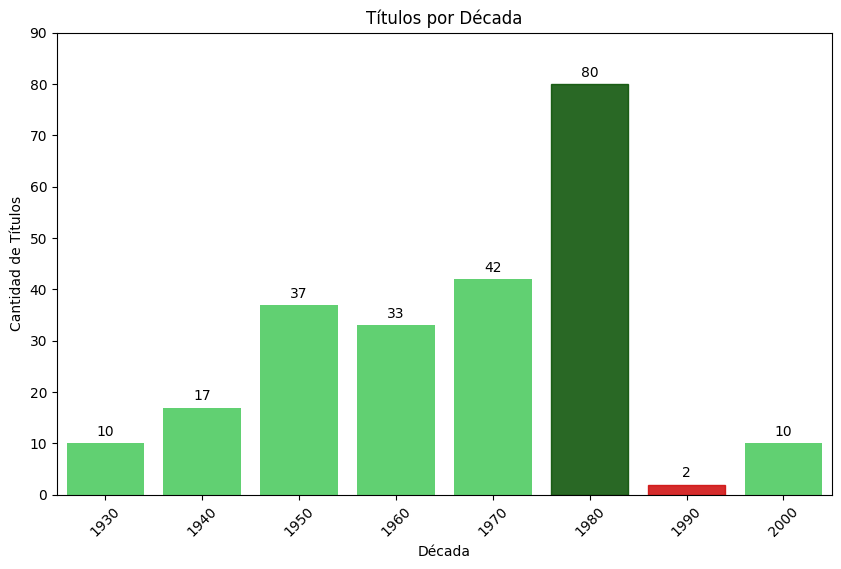

In [100]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=decadas_titulos.index,
            y=decadas_titulos.values,
            color="#4EE365")

plt.title("Títulos por Década")
plt.xlabel("Década")
plt.ylabel("Cantidad de Títulos")
plt.ylim(0,90)
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0], padding=3)
ax.patches[5].set_color("#064F01DB")
ax.patches[6].set_color("#CF0909DB")

plt.show()

No solo hay muy pocos títulos en relación a otras décadas sino que, puntualmente, hay muchísima diferencia con la de 1980.

## Exploración general por década:  
-Cantidad de jugadores (1980 y 1990)  
-Nombre y apellido de ganadoress de cada Grand Slam

In [101]:
#Cantidad de jugadores nacidos en 1980

jugadores_1980_total = jugadores.copy()
jugadores_1980_total.dropna(inplace=True)
jugadores_1980_total["dob"] = jugadores_1980_total["dob"].astype(str).str[:4].astype(int)
jugadores_1980_total[(jugadores_1980_total["dob"] >= 1980) & (jugadores_1980_total["dob"] < 1990)]["player_id"].count()

np.int64(523)

In [102]:
#Cantidad de jugadores nacidos en 1990

jugadores_1990_total = jugadores_1980_total[(jugadores_1980_total["dob"] >= 1990) & (jugadores_1980_total["dob"] < 2000)]["player_id"].count()
jugadores_1990_total

np.int64(425)

In [103]:
#Cantida de títulos por nombre de década de 1930

pie1930 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1930]["winner_name"].value_counts()
pie1930

winner_name
Rod Laver        5
Ken Rosewall     4
Andres Gimeno    1
Name: count, dtype: int64

In [104]:
#Cantida de títulos por nombre de década de 1940

pie1940 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1940]["winner_name"].value_counts()
pie1940

winner_name
John Newcombe     5
Jan Kodes         3
Arthur Ashe       3
Ilie Nastase      2
Stan Smith        2
Bill Bowrey       1
Manuel Orantes    1
Name: count, dtype: int64

In [105]:
#Cantida de títulos por nombre de década de 1950

pie1950 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1950]["winner_name"].value_counts()
pie1950

winner_name
Bjorn Borg          11
Jimmy Connors        8
John McEnroe         7
Guillermo Vilas      4
Johan Kriek          2
Adriano Panatta      1
Roscoe Tanner        1
Mark Edmondson       1
Vitas Gerulaitis     1
Brian Teacher        1
Name: count, dtype: int64

In [106]:
#Cantida de títulos por nombre de década de 1960

pie1960 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1960]["winner_name"].value_counts()
pie1960

winner_name
Ivan Lendl       8
Mats Wilander    7
Stefan Edberg    6
Boris Becker     6
Yannick Noah     1
Pat Cash         1
Andres Gomez     1
Michael Stich    1
Thomas Muster    1
Petr Korda       1
Name: count, dtype: int64

In [107]:
#Cantida de títulos por nombre de década de 1970

pie1970 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1970]["winner_name"].value_counts()
pie1970

winner_name
Pete Sampras          14
Andre Agassi           8
Jim Courier            4
Gustavo Kuerten        3
Yevgeny Kafelnikov     2
Sergi Bruguera         2
Patrick Rafter         2
Michael Chang          1
Richard Krajicek       1
Carlos Moya            1
Goran Ivanisevic       1
Albert Costa           1
Thomas Johansson       1
Gaston Gaudio          1
Name: count, dtype: int64

In [108]:
#Cantida de títulos por nombre de década de 1980

pie1980 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1980]["winner_name"].value_counts()
pie1980

winner_name
Novak Djokovic           24
Rafael Nadal             22
Roger Federer            20
Stan Wawrinka             3
Andy Murray               3
Marat Safin               2
Lleyton Hewitt            2
Juan Carlos Ferrero       1
Andy Roddick              1
Juan Martin del Potro     1
Marin Cilic               1
Name: count, dtype: int64

In [109]:
#Cantida de títulos por nombre de década de 1990

pie1990 = gs_finales_limpio[gs_finales_limpio["winner_year"]==1990]["winner_name"].value_counts()
pie1990

winner_name
Dominic Thiem      1
Daniil Medvedev    1
Name: count, dtype: int64

In [110]:
#Cantida de títulos por nombre de década de 2000

pie2000 = gs_finales_limpio[gs_finales_limpio["winner_year"]==2000]["winner_name"].value_counts()
pie2000

winner_name
Carlos Alcaraz    6
Jannik Sinner     4
Name: count, dtype: int64

## **Exploración de la década de 1980**

En la década del 80 no solo hay muchísimos más títulos qu een cualquier otra década sino que la gran parte está agrupada en tres tenistas: Federer, Nadal y Djokovic.  

A partir de aquí, serán analizadas en mayor profundidad ya que gran parte de la razón por la que los de 1990 no tienen títulos es por ellos tres.

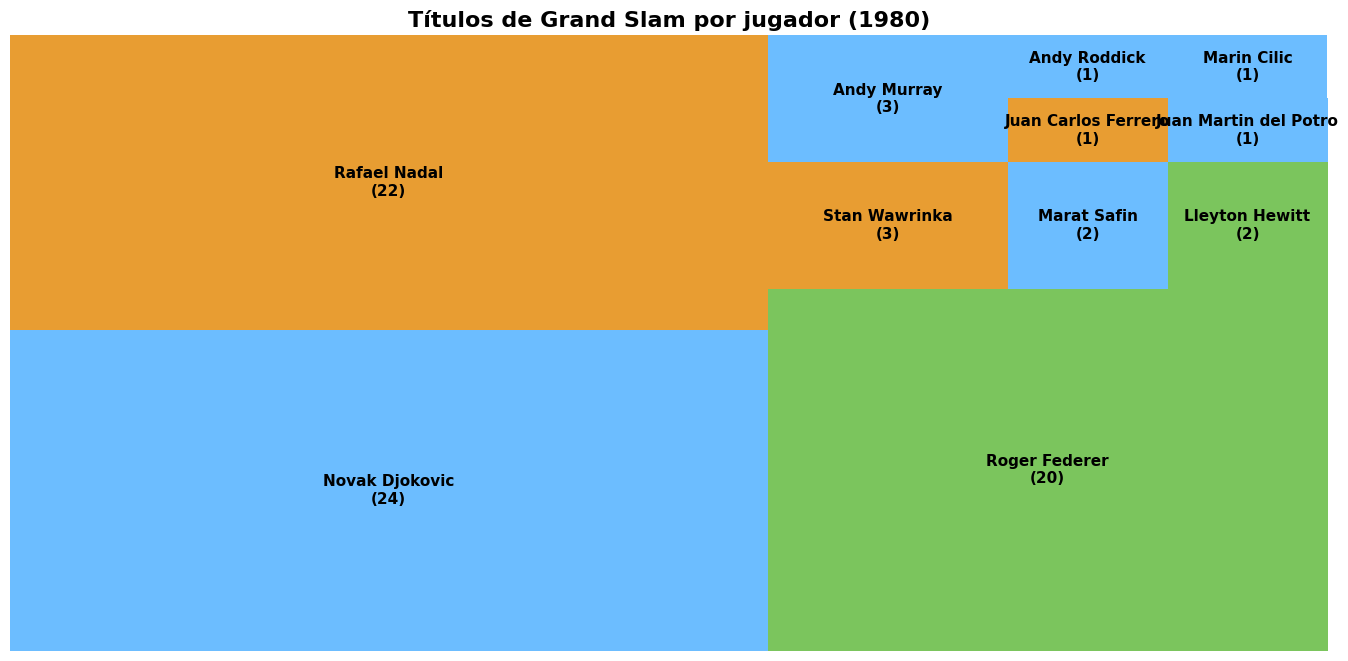

In [111]:
data = gs_finales_limpio[gs_finales_limpio["winner_year"]==1980]["winner_name"].value_counts()

nombres = data.index.tolist()
cantidad = data.values.tolist()

colors = ["#5cb6ff", "#e6921c", "#6dbf4b", "#e6921c", "#5cb6ff",
          "#5cb6ff", "#6dbf4b", "#e6921c", "#5cb6ff", "#5cb6ff", "#5cb6ff"]

plt.figure(figsize=(17, 8))
squarify.plot(
    sizes=cantidad,
    label=[f"{n}\n({v})" for n, v in zip(nombres, cantidad)],
    color=colors[:len(cantidad)],
    alpha=0.9,
    text_kwargs={'fontsize': 11, 'weight': 'bold'}
)

plt.axis("off")
plt.title("Títulos de Grand Slam por jugador (1980)", fontsize=16, fontweight='bold')
plt.show()

In [112]:
#Cantidad de GS del BIG3

big3 = ["Roger Federer", "Rafael Nadal", "Novak Djokovic"]
gs_finales_limpio[gs_finales_limpio["winner_name"].isin(big3)]["winner_name"].count()

np.int64(66)

In [113]:
#Finales ganadas por B3

finales_ganadas_b3 = gs_finales_limpio[gs_finales_limpio["winner_name"].isin(big3)][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', 'tourney_year', 'winner_year', 'loser_year']]

finales_ganadas_b3

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
141,Wimbledon,Grass,Roger Federer,Mark Philippoussis,2003,1980,1970
145,Wimbledon,Grass,Roger Federer,Andy Roddick,2004,1980,1980
146,US Open,Hard,Roger Federer,Lleyton Hewitt,2004,1980,1980
147,Australian Open,Hard,Roger Federer,Marat Safin,2004,1980,1980
148,Roland Garros,Clay,Rafael Nadal,Mariano Puerta,2005,1980,1970
...,...,...,...,...,...,...,...
216,Roland Garros,Clay,Rafael Nadal,Casper Ruud,2022,1980,1990
217,Wimbledon,Grass,Novak Djokovic,Nick Kyrgios,2022,1980,1990
219,Australian Open,Hard,Novak Djokovic,Stefanos Tsitsipas,2023,1980,1990
220,Roland Garros,Clay,Novak Djokovic,Casper Ruud,2023,1980,1990


In [114]:
#Finales perdidas por B3

finales_perdidas_b3 = gs_finales_limpio[gs_finales_limpio["loser_name"].isin(big3)][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', 'tourney_year', 'winner_year', 'loser_year']]

finales_perdidas_b3

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
152,Roland Garros,Clay,Rafael Nadal,Roger Federer,2006,1980,1980
153,Wimbledon,Grass,Roger Federer,Rafael Nadal,2006,1980,1980
156,Roland Garros,Clay,Rafael Nadal,Roger Federer,2007,1980,1980
157,Wimbledon,Grass,Roger Federer,Rafael Nadal,2007,1980,1980
158,US Open,Hard,Roger Federer,Novak Djokovic,2007,1980,1980
160,Roland Garros,Clay,Rafael Nadal,Roger Federer,2008,1980,1980
161,Wimbledon,Grass,Rafael Nadal,Roger Federer,2008,1980,1980
166,US Open,Hard,Juan Martin del Potro,Roger Federer,2009,1980,1980
167,Australian Open,Hard,Rafael Nadal,Roger Federer,2009,1980,1980
171,US Open,Hard,Rafael Nadal,Novak Djokovic,2010,1980,1980


In [115]:
#Finales perdidas contra NO-B3

finales_perdidas_no_b3 = gs_finales_limpio[(gs_finales_limpio["loser_name"].isin(big3) & (~gs_finales_limpio["winner_name"].isin(big3)))][['tourney_name', 'surface', 'winner_name', 'loser_name', 'tourney_year', 'winner_year', 'loser_year']]
finales_perdidas_no_b3

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
166,US Open,Hard,Juan Martin del Potro,Roger Federer,2009,1980,1980
179,US Open,Hard,Andy Murray,Novak Djokovic,2012,1980,1980
182,Wimbledon,Grass,Andy Murray,Novak Djokovic,2013,1980,1980
184,Australian Open,Hard,Stan Wawrinka,Rafael Nadal,2014,1980,1980
189,Roland Garros,Clay,Stan Wawrinka,Novak Djokovic,2015,1980,1980
195,US Open,Hard,Stan Wawrinka,Novak Djokovic,2016,1980,1980
213,Us Open,Hard,Daniil Medvedev,Novak Djokovic,2021,1990,1980
221,Wimbledon,Grass,Carlos Alcaraz,Novak Djokovic,2023,2000,1980
225,Wimbledon,Grass,Carlos Alcaraz,Novak Djokovic,2024,2000,1980


In [116]:
#¿Cuántas finales se jugaron desde la primera en la que participó uno de los B3?
#¿En cuántas no estuvieron presentes ninguno de los 3?

finales_gs_sin_big3 = gs_finales_limpio[(~gs_finales_limpio["loser_name"].isin(big3) & (~gs_finales_limpio["winner_name"].isin(big3)))][['tourney_name', 'surface', 'winner_name', 'loser_name', 'tourney_year', 'winner_year', 'loser_year']]
numero_sin_big3 = len(finales_gs_sin_big3[finales_gs_sin_big3["tourney_year"] > 2002])
print(f"Finales totales desde 2003: {len(gs_finales_limpio.loc[141:])}")
print(f"Finales sin el BIG3 desde 2003: {numero_sin_big3}")

Finales totales desde 2003: 90
Finales sin el BIG3 desde 2003: 16


In [117]:
#finales ganadas por Federer

finales_federer = gs_finales_limpio[gs_finales_limpio["winner_name"]=="Roger Federer"][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', "winner_age", 'tourney_year', 'winner_year', 'loser_year']]
finales_federer

,tourney_name,surface,winner_name,loser_name,winner_age,tourney_year,winner_year,loser_year
141,Wimbledon,Grass,Roger Federer,Mark Philippoussis,21.8,2003,1980,1970
145,Wimbledon,Grass,Roger Federer,Andy Roddick,22.8,2004,1980,1980
146,US Open,Hard,Roger Federer,Lleyton Hewitt,23.0,2004,1980,1980
147,Australian Open,Hard,Roger Federer,Marat Safin,22.4,2004,1980,1980
149,Wimbledon,Grass,Roger Federer,Andy Roddick,23.8,2005,1980,1980
150,US Open,Hard,Roger Federer,Andre Agassi,24.0,2005,1980,1970
153,Wimbledon,Grass,Roger Federer,Rafael Nadal,24.8,2006,1980,1980
154,US Open,Hard,Roger Federer,Andy Roddick,25.0,2006,1980,1980
155,Australian Open,Hard,Roger Federer,Marcos Baghdatis,24.4,2006,1980,1980
157,Wimbledon,Grass,Roger Federer,Rafael Nadal,25.8,2007,1980,1980


In [118]:
#finales ganadas por Nadal

finales_nadal = gs_finales_limpio[gs_finales_limpio["winner_name"]=="Rafael Nadal"][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', "winner_age", 'tourney_year', 'winner_year', 'loser_year']]
finales_nadal

,tourney_name,surface,winner_name,loser_name,winner_age,tourney_year,winner_year,loser_year
148,Roland Garros,Clay,Rafael Nadal,Mariano Puerta,18.9,2005,1980,1970
152,Roland Garros,Clay,Rafael Nadal,Roger Federer,19.9,2006,1980,1980
156,Roland Garros,Clay,Rafael Nadal,Roger Federer,20.9,2007,1980,1980
160,Roland Garros,Clay,Rafael Nadal,Roger Federer,21.9,2008,1980,1980
161,Wimbledon,Grass,Rafael Nadal,Roger Federer,22.0,2008,1980,1980
167,Australian Open,Hard,Rafael Nadal,Roger Federer,22.6,2009,1980,1980
169,Roland Garros,Clay,Rafael Nadal,Robin Soderling,23.9,2010,1980,1980
170,Wimbledon,Grass,Rafael Nadal,Tomas Berdych,24.0,2010,1980,1980
171,US Open,Hard,Rafael Nadal,Novak Djokovic,24.2,2010,1980,1980
173,Roland Garros,Clay,Rafael Nadal,Roger Federer,24.9,2011,1980,1980


In [119]:
#finales ganadas por Djokovic

finales_novak = gs_finales_limpio[gs_finales_limpio["winner_name"]=="Novak Djokovic"][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', "winner_age", 'tourney_year', 'winner_year', 'loser_year']]
finales_novak

,tourney_name,surface,winner_name,loser_name,winner_age,tourney_year,winner_year,loser_year
163,Australian Open,Hard,Novak Djokovic,Jo-Wilfried Tsonga,20.6,2008,1980,1980
172,Australian Open,Hard,Novak Djokovic,Andy Murray,23.6,2011,1980,1980
174,Wimbledon,Grass,Novak Djokovic,Rafael Nadal,24.0,2011,1980,1980
175,US Open,Hard,Novak Djokovic,Rafael Nadal,24.2,2011,1980,1980
176,Australian Open,Hard,Novak Djokovic,Rafael Nadal,24.6,2012,1980,1980
180,Australian Open,Hard,Novak Djokovic,Andy Murray,25.6,2013,1980,1980
186,Wimbledon,Grass,Novak Djokovic,Roger Federer,27.0,2014,1980,1980
188,Australian Open,Hard,Novak Djokovic,Andy Murray,27.6,2015,1980,1980
190,Wimbledon,Grass,Novak Djokovic,Roger Federer,28.1,2015,1980,1980
191,US Open,Hard,Novak Djokovic,Roger Federer,28.2,2015,1980,1980


Las conclusiones generales obtenidas es que el BIG3 fue el dominador total y absoluto tras ganar uan cantidad inmensa de GS. Entre tantos títulos se repite cierta preferencia indivisual sobre la superficie en la que juegan.

## **Predominancia por superficie y a lo largo del tiempo**

Finales de Federer en Grass

In [120]:
finales_federer[finales_federer["surface"]=="Grass"]

,tourney_name,surface,winner_name,loser_name,winner_age,tourney_year,winner_year,loser_year
141,Wimbledon,Grass,Roger Federer,Mark Philippoussis,21.8,2003,1980,1970
145,Wimbledon,Grass,Roger Federer,Andy Roddick,22.8,2004,1980,1980
149,Wimbledon,Grass,Roger Federer,Andy Roddick,23.8,2005,1980,1980
153,Wimbledon,Grass,Roger Federer,Rafael Nadal,24.8,2006,1980,1980
157,Wimbledon,Grass,Roger Federer,Rafael Nadal,25.8,2007,1980,1980
165,Wimbledon,Grass,Roger Federer,Andy Roddick,27.8,2009,1980,1980
178,Wimbledon,Grass,Roger Federer,Andy Murray,30.8,2012,1980,1980
198,Wimbledon,Grass,Roger Federer,Marin Cilic,35.9,2017,1980,1980


Finales de Nadal de Clay

In [121]:
finales_nadal[finales_nadal["surface"]=="Clay"]

,tourney_name,surface,winner_name,loser_name,winner_age,tourney_year,winner_year,loser_year
148,Roland Garros,Clay,Rafael Nadal,Mariano Puerta,18.9,2005,1980,1970
152,Roland Garros,Clay,Rafael Nadal,Roger Federer,19.9,2006,1980,1980
156,Roland Garros,Clay,Rafael Nadal,Roger Federer,20.9,2007,1980,1980
160,Roland Garros,Clay,Rafael Nadal,Roger Federer,21.9,2008,1980,1980
169,Roland Garros,Clay,Rafael Nadal,Robin Soderling,23.9,2010,1980,1980
173,Roland Garros,Clay,Rafael Nadal,Roger Federer,24.9,2011,1980,1980
177,Roland Garros,Clay,Rafael Nadal,Novak Djokovic,25.9,2012,1980,1980
181,Roland Garros,Clay,Rafael Nadal,David Ferrer,26.9,2013,1980,1980
185,Roland Garros,Clay,Rafael Nadal,Novak Djokovic,27.9,2014,1980,1980
197,Roland Garros,Clay,Rafael Nadal,Stan Wawrinka,30.9,2017,1980,1980


Finales de Novak en Hard

In [122]:
finales_novak[finales_novak["surface"]=="Hard"]

,tourney_name,surface,winner_name,loser_name,winner_age,tourney_year,winner_year,loser_year
163,Australian Open,Hard,Novak Djokovic,Jo-Wilfried Tsonga,20.6,2008,1980,1980
172,Australian Open,Hard,Novak Djokovic,Andy Murray,23.6,2011,1980,1980
175,US Open,Hard,Novak Djokovic,Rafael Nadal,24.2,2011,1980,1980
176,Australian Open,Hard,Novak Djokovic,Rafael Nadal,24.6,2012,1980,1980
180,Australian Open,Hard,Novak Djokovic,Andy Murray,25.6,2013,1980,1980
188,Australian Open,Hard,Novak Djokovic,Andy Murray,27.6,2015,1980,1980
191,US Open,Hard,Novak Djokovic,Roger Federer,28.2,2015,1980,1980
192,Australian Open,Hard,Novak Djokovic,Andy Murray,28.6,2016,1980,1980
203,US Open,Hard,Novak Djokovic,Juan Martin del Potro,31.2,2018,1980,1980
204,Australian Open,Hard,Novak Djokovic,Rafael Nadal,31.6,2019,1980,1980


In [123]:
gs_finales_limpio[gs_finales_limpio["winner_name"].isin(big3)].groupby("winner_name")["tourney_name"].value_counts()

winner_name     tourney_name   
Novak Djokovic  Australian Open    10
                Wimbledon           7
                US Open             4
                Roland Garros       3
Rafael Nadal    Roland Garros      14
                US Open             4
                Australian Open     2
                Wimbledon           2
Roger Federer   Wimbledon           8
                Australian Open     6
                US Open             5
                Roland Garros       1
Name: count, dtype: int64

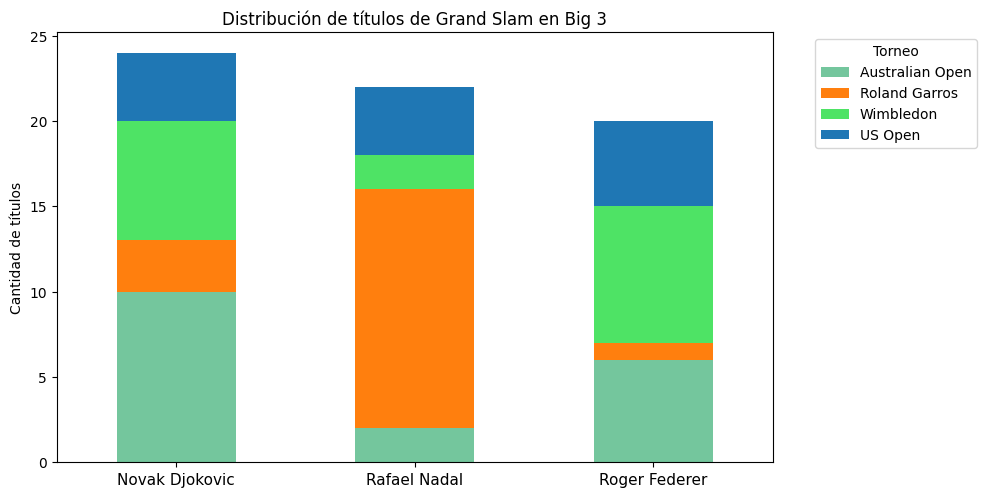

In [124]:
df_plot = (
    gs_finales_limpio[gs_finales_limpio["winner_name"].isin(big3)]
    .groupby(["winner_name", "tourney_name"])
    .size()
    .reset_index(name="count")
)

df_plot_pivot = df_plot.pivot(index="winner_name", columns="tourney_name", values="count").fillna(0)

order = ["Australian Open", "Roland Garros", "Wimbledon", "US Open"]
df_plot_pivot = df_plot_pivot[order]

ax = df_plot_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=["#74c69d", "#ff7f0e", "#4EE365", "#1f77b4"]
)

plt.title("Distribución de títulos de Grand Slam en Big 3")
plt.ylabel("Cantidad de títulos")
plt.xlabel("")
plt.legend(title="Torneo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=11)

plt.show()

Se evidencia una preferencia por el césped de Federer, del clay por Nadal y de Djokovic por el cemento. Ya que cada uno fue especialista en cada superficie, dificultó que los d ela década del 90 puedan triunfar. Y al haberlo hecho en un período de 20 años, más aún. Este factor es fundamental y se une con lo visto al inicio: el pico de rendimiento es entre los 22 y 27 años aproximadamente, pero parece ser que el BIG3 dominó durante más.

## **Edades de los campeones**

In [125]:
#Promedio de edad con la que se gana GS
round(gs_finales_limpio.describe()[["winner_age", "loser_age"]], 2)

,winner_age,loser_age
count,231.00,231.00
mean,25.82,25.84
std,4.39,3.79
min,17.20,18.70
25%,22.45,23.35
50%,25.00,25.20
75%,28.55,27.45
max,37.10,39.80


In [126]:
#ganador más jóven de un GS
gs_finales_limpio[gs_finales_limpio["winner_age"]==17.20]

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob,tourney_year,winner_year,loser_year,decada_torneo
84,Roland Garros,Clay,G,19890529,102021,Michael Chang,USA,17.2,101222,Stefan Edberg,SWE,23.3,F,19720222.0,19660119.0,1989,1970,1960,1980


In [127]:
#ganador más viejo
gs_finales_limpio[gs_finales_limpio["winner_age"]==37.10]

,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob,tourney_year,winner_year,loser_year,decada_torneo
19,Australian Open,Grass,G,19711226,100016,Ken Rosewall,AUS,37.1,100017,Mal Anderson,AUS,36.8,F,19341102.0,19350303.0,1971,1930,1930,1970


In [128]:
#MISMO ANÁLISIS ANTERIOR PERO SIN EL BIG3
round(gs_finales_limpio[~gs_finales_limpio["winner_name"].isin(big3)].describe()[["winner_age"]], 2)

,winner_age
count,165.00
mean,24.94
std,3.85
min,17.20
25%,22.10
50%,24.60
75%,26.90
max,37.10


**CONCLUSIONES**  
Hay cuatro grupos  
  
Promesas: menores de 22.1  
Jóvenes: entre 22.1 - 24.6  
Pico de rendimiento: 24.6 - 26.9  
Veteranos: mayores a 26.9 !  
  
EL 75% lo gana hasta 26.9 años (!)

In [129]:
#MISMO ANÁLISIS ANTERIOR PERO SIN EL BIG3
round(gs_finales_limpio[gs_finales_limpio["winner_name"].isin(big3)].describe()[["winner_age"]], 2)

,winner_age
count,66.00
mean,28.03
std,4.89
min,18.90
25%,24.05
50%,27.40
75%,32.05
max,36.40


**CONCLUSIONES**  
El BIG3 a sus 27.4 recién había ganado LA MITAD de todos sus títulos de GS.  
Alargaron el período del pico de rendimiento.

C:\Users\ijdia\AppData\Local\Temp\ipykernel_17092\3622991894.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_comparacion, x='Grupo', y='Edad', palette='Set2')


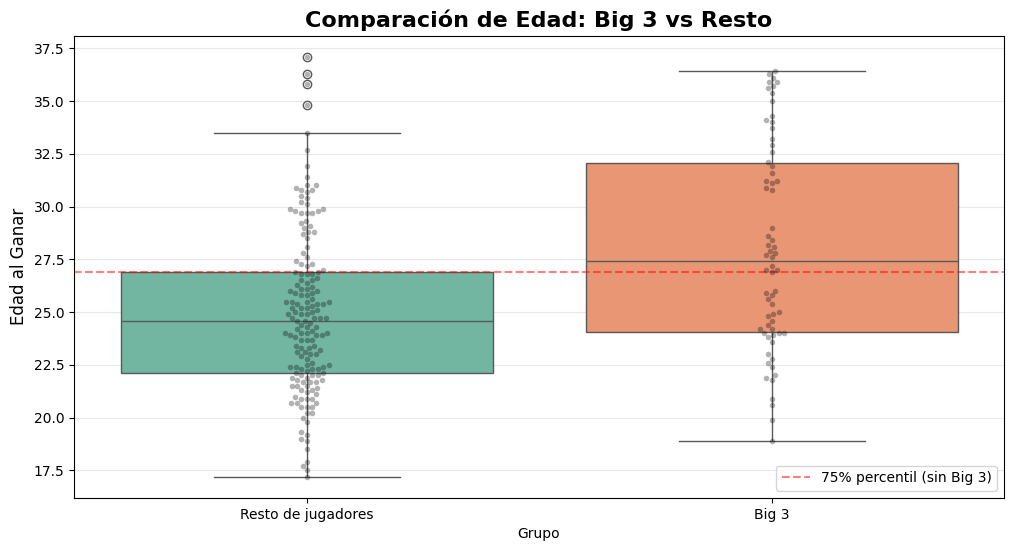

In [130]:
# Sin Big 3
sin_big3 = gs_finales_limpio[~gs_finales_limpio["winner_name"].isin(big3)]
# Con Big 3
con_big3 = gs_finales_limpio[gs_finales_limpio["winner_name"].isin(big3)]

# Gráfico comparativo
plt.figure(figsize=(12, 6))
datos_comparacion = pd.DataFrame({
    'Edad': list(sin_big3['winner_age']) + list(con_big3['winner_age']),
    'Grupo': ['Resto de jugadores']*len(sin_big3) + ['Big 3']*len(con_big3)
})

sns.boxplot(data=datos_comparacion, x='Grupo', y='Edad', palette='Set2')
sns.swarmplot(data=datos_comparacion, x='Grupo', y='Edad', color='black', alpha=0.3, size=4)

plt.title('Comparación de Edad: Big 3 vs Resto', fontsize=16, fontweight='bold')
plt.ylabel('Edad al Ganar', fontsize=12)
plt.axhline(y=26.9, color='red', linestyle='--', alpha=0.5, label='75% percentil (sin Big 3)')
plt.legend(loc="lower right")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [131]:
gs_finales_limpio[(~gs_finales_limpio["winner_name"].isin(big3)) & (gs_finales_limpio["winner_age"]>34)]


,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,loser_name,loser_ioc,loser_age,round,winner_dob,loser_dob,tourney_year,winner_year,loser_year,decada_torneo
10,US Open,Grass,G,19700902,100016,Ken Rosewall,AUS,35.8,100100,Tony Roche,AUS,25.2,F,19341102.0,19450517.0,1970,1930,1940,1970
15,Australian Open,Grass,G,19710307,100016,Ken Rosewall,AUS,36.3,100074,Arthur Ashe,USA,27.6,F,19341102.0,19430710.0,1971,1930,1940,1970
16,Roland Garros,Clay,G,19720522,100026,Andres Gimeno,ESP,34.8,100185,Patrick Proisy,FRA,22.6,F,19370803.0,19490910.0,1972,1930,1940,1970
19,Australian Open,Grass,G,19711226,100016,Ken Rosewall,AUS,37.1,100017,Mal Anderson,AUS,36.8,F,19341102.0,19350303.0,1971,1930,1930,1970


La línea roja, que marca el 75% de los títulos obtenidos del resto de los jugadores, está prácticamente a la misma que del 50% del BIG. El gráfico es elocuente y tiene el agregado de que lo que se consideran valores OUTSIDER para los tenistas "normales" (ganar con 35, 36 y 37 años) par ael BIG3 está dentro de lo esperado.

In [132]:
round(finales_federer.describe(), 2)

,winner_age,tourney_year,winner_year,loser_year
count,20.00,20.00,20.0,20.00
mean,26.93,2008.20,1980.0,1979.00
std,4.46,4.53,0.0,3.08
min,21.80,2003.00,1980.0,1970.00
25%,23.95,2005.00,1980.0,1980.00
50%,25.60,2007.00,1980.0,1980.00
75%,27.95,2009.25,1980.0,1980.00
max,36.40,2018.00,1980.0,1980.00


In [133]:
round(finales_nadal.describe(), 2)

,winner_age,tourney_year,winner_year,loser_year
count,22.00,22.00,22.0,22.00
mean,27.14,2013.18,1980.0,1981.82
std,5.31,5.29,0.0,5.01
min,18.90,2005.00,1980.0,1970.00
25%,22.92,2009.25,1980.0,1980.00
50%,26.40,2012.50,1980.0,1980.00
75%,31.72,2017.75,1980.0,1980.00
max,35.90,2022.00,1980.0,1990.00


In [134]:
round(finales_novak.describe(), 2)

,winner_age,tourney_year,winner_year,loser_year
count,24.00,24.00,24.0,24.00
mean,29.78,2016.88,1980.0,1983.33
std,4.51,4.44,0.0,4.82
min,20.60,2008.00,1980.0,1980.00
25%,26.65,2013.75,1980.0,1980.00
50%,30.05,2017.00,1980.0,1980.00
75%,33.78,2021.00,1980.0,1990.00
max,36.30,2023.00,1980.0,1990.00


**CONCLUSIONES:**  
Federer tuvo seis años magníficos, de 2003 a 2009.  
Nadal comenzó de muy pequeño y logró ser más constante hasta pasados los 30 años.  
Djokovic irrumpió más tarde que los otros dos y fue el más regular de los tres.  

Los tres ganaron siendo "viejos", con 36 años.

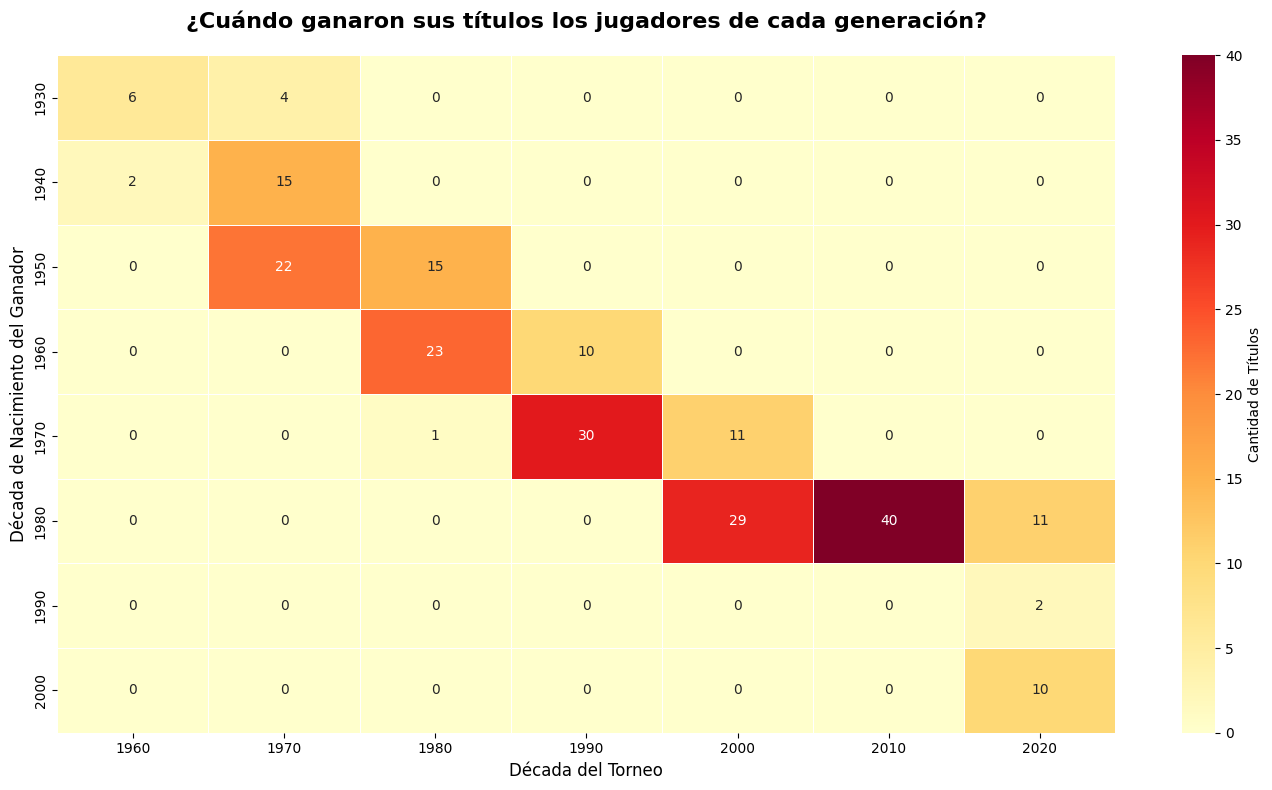

In [135]:
# Contar títulos por década de nacimiento y década de torneo
heatmap_data = gs_finales_limpio.groupby(['winner_year', 'decada_torneo']).size().unstack(fill_value=0)

# Gráfico
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, 
            annot=True,
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Cantidad de Títulos'})

plt.title('¿Cuándo ganaron sus títulos los jugadores de cada generación?', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Década del Torneo', fontsize=12)
plt.ylabel('Década de Nacimiento del Ganador', fontsize=12)
plt.tight_layout()
plt.show()

Desde la Era Abierta, hay una tendencia que se sostuvo que responde al pico de rendimiento de todos los tenistas hasta la irrupción del BIG3. Al ser el pico de rendimiento entre los 22 y los 27 años, cada década de jugadores DOMINA ente dos y tres decadas siguientes a su nacimiento.  

Se puede ver claramente cómo se rompe la "escalera" con la década de 1980 y opacan a los de 1990.  

Los de 2000 parecieran continuar con la tendencia original.

## Rendimiento de tenistas de la década de 1990

In [136]:
#Finales con al menos UN jugador de 1990

filtro1990 = (gs_finales_limpio['winner_year']==1990) | (gs_finales_limpio['loser_year']==1990)
filtro1990_ganador = gs_finales_limpio['winner_year']==1990

gs_finales_limpio[filtro1990][['tourney_name', 'surface', 'winner_name', 'loser_name', 'tourney_year', 'winner_year', 'loser_year']]

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
194,Wimbledon,Grass,Andy Murray,Milos Raonic,2016,1980,1990
201,Roland Garros,Clay,Rafael Nadal,Dominic Thiem,2018,1980,1990
205,Roland Garros,Clay,Rafael Nadal,Dominic Thiem,2019,1980,1990
207,US Open,Hard,Rafael Nadal,Daniil Medvedev,2019,1980,1990
208,Australian Open,Hard,Novak Djokovic,Dominic Thiem,2020,1980,1990
209,Us Open,Hard,Dominic Thiem,Alexander Zverev,2020,1990,1990
211,Roland Garros,Clay,Novak Djokovic,Stefanos Tsitsipas,2021,1980,1990
212,Wimbledon,Grass,Novak Djokovic,Matteo Berrettini,2021,1980,1990
213,Us Open,Hard,Daniil Medvedev,Novak Djokovic,2021,1990,1980
214,Australian Open,Hard,Novak Djokovic,Daniil Medvedev,2021,1980,1990


In [137]:
print("Jugaron: ")
print(len(gs_finales_limpio[filtro1990][['tourney_name', 'surface', 'winner_name', 'loser_name', 'tourney_year', 'winner_year', 'loser_year']]))

print("-"*10)

print("Ganaron: ")
print(len(gs_finales_limpio[filtro1990_ganador]))

Jugaron: 
21
----------
Ganaron: 
2


In [138]:
#Mejor ranking alcanzado de los mejores tenistas nacidos en el 90

lista_jugadores_1990 = ["Raonic M.", "Thiem D.", "Medvedev D.", "Zverev A.", "Tsitsipas S.", "Berrettini M.", "Ruud C.", "Kyrgios N.", "Fritz T."]
df_filtrado = df_4[df_4["Player_1"].isin(lista_jugadores_1990)]

mejor_ranking = df_filtrado.loc[df_filtrado.groupby("Player_1")["Rank_1"].idxmin(), ["Player_1", "Rank_1", "Año"]].sort_values("Rank_1", ascending=True)
mejor_ranking

,Player_1,Rank_1,Año
57028,Medvedev D.,1,2022
58577,Ruud C.,2,2022
64154,Zverev A.,2,2024
45206,Raonic M.,3,2017
55768,Tsitsipas S.,3,2021
53349,Thiem D.,3,2020
64352,Fritz T.,4,2025
56900,Berrettini M.,6,2022
45342,Kyrgios N.,13,2017


C:\Users\ijdia\AppData\Local\Temp\ipykernel_17092\3602558019.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{name}\n({int(mejor_ranking[mejor_ranking['Player_1']==name]['Año'].values[0])})"


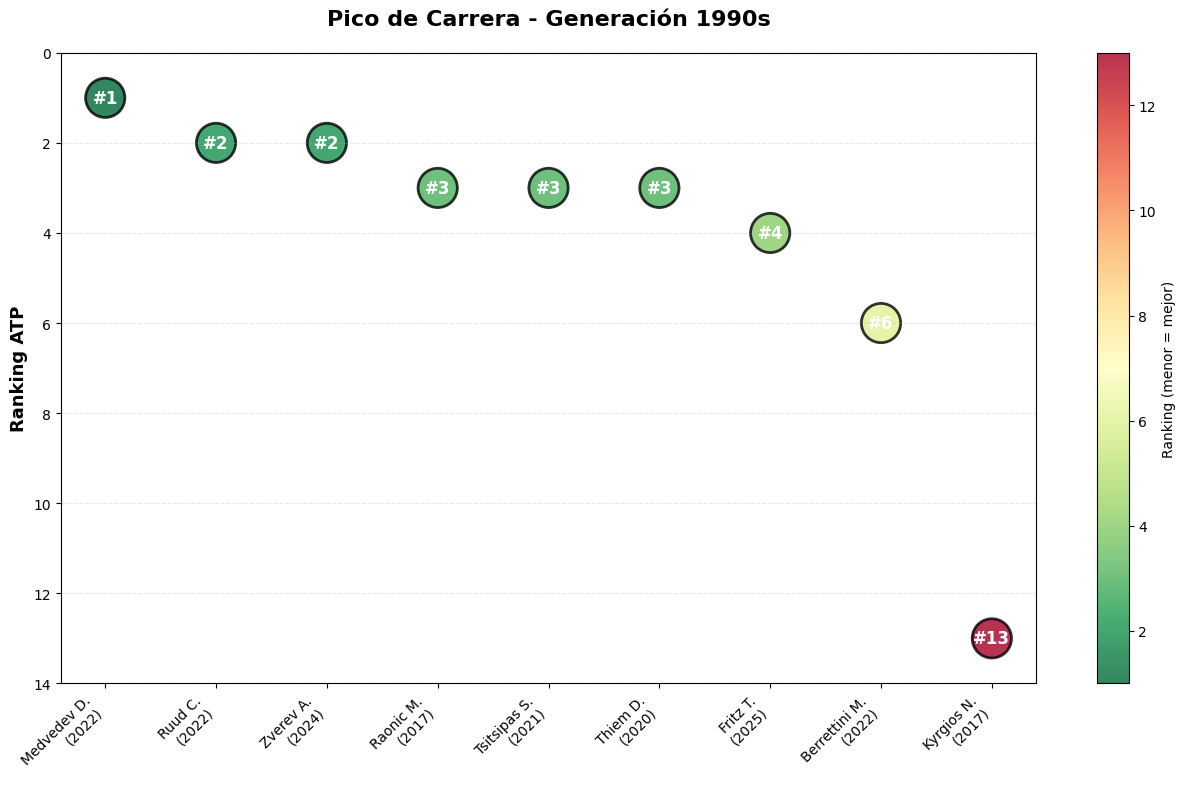

In [139]:
fig, ax = plt.subplots(figsize=(13, 8))

# Colores
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(mejor_ranking)))

# Puntos grandes
scatter = ax.scatter(mejor_ranking['Player_1'], 
                     mejor_ranking['Rank_1'],
                     s=800,
                     c=mejor_ranking['Rank_1'],
                     cmap='RdYlGn_r',
                     alpha=0.8,
                     edgecolors='black',
                     linewidth=2)

# Números dentro
for idx, row in mejor_ranking.iterrows():
    ax.text(row['Player_1'], row['Rank_1'], 
            f"#{int(row['Rank_1'])}",
            va='center', ha='center',
            fontweight='bold', fontsize=12, color='white')

# Año debajo del nombre
ax.set_xticklabels([f"{name}\n({int(mejor_ranking[mejor_ranking['Player_1']==name]['Año'].values[0])})" 
                     for name in mejor_ranking['Player_1']], 
                    rotation=45, ha='right')

ax.invert_yaxis()
ax.set_ylabel('Ranking ATP', fontsize=13, fontweight='bold')
ax.set_title('Pico de Carrera - Generación 1990s', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(14, 0)

plt.colorbar(scatter, label='Ranking (menor = mejor)', ax=ax)
plt.tight_layout()
plt.show()

Si bien hay solo dos finales ganadas, los de 1990 tuvieron buenas oportunidades tras llegar a 21 finales. No solo este número sugiere que estuvieron cerca de coronarse sino que el mejor ranking de los exponenetes de la década indica que intentaron y compiieron a un alto nivel. Además, si analizamos la cantidad de títulos NO-GS, se ve  una cantidad más que interesante.

In [140]:
lista_jugadores_1990 = ["Raonic M.", "Thiem D.", "Medvedev D.", "Zverev A.", "Tsitsipas S.", "Berrettini M.", "Ruud C.", "Kyrgios N.", "Fritz T."]
titulos_1990 = df_4[(df_4["Winner"].isin(lista_jugadores_1990)) & (df_4["Round"]=="The Final")][["Date", "Surface", "Player_1", "Player_2", "Winner"]]
titulos_1990_agrupados = titulos_1990.groupby("Winner")["Winner"].value_counts().sort_values(ascending=False)
titulos_1990_agrupados


Winner
Zverev A.        23
Medvedev D.      20
Thiem D.         17
Ruud C.          13
Tsitsipas S.     11
Berrettini M.    10
Fritz T.         10
Raonic M.         8
Kyrgios N.        7
Name: count, dtype: int64

In [141]:
titulos_1990_agrupados.values.sum()

np.int64(119)

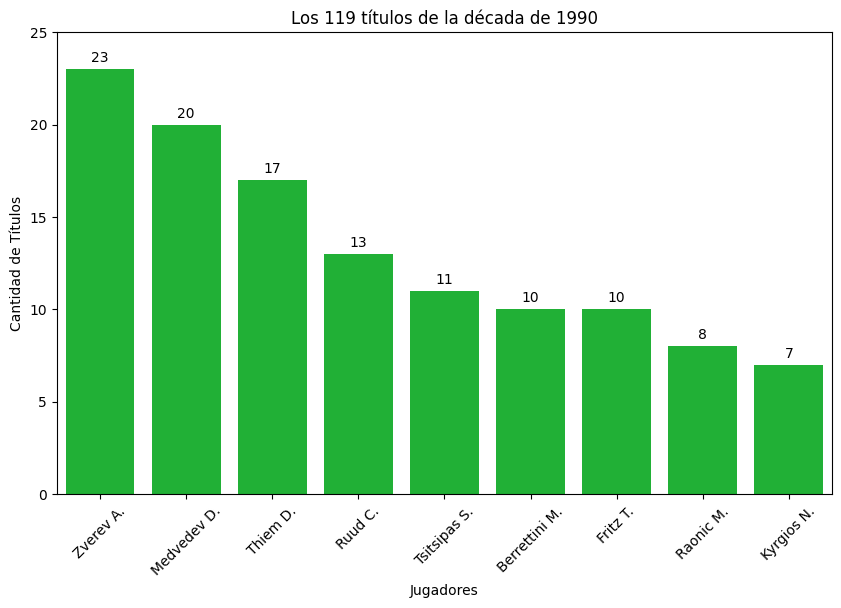

In [142]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=titulos_1990_agrupados.index,
            y=titulos_1990_agrupados.values,
            color="#09C825")

plt.title("Los 119 títulos de la década de 1990")
plt.xlabel("Jugadores")
plt.ylabel("Cantidad de Títulos")
plt.ylim(0,25)
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0], padding=3)

plt.show()

## **Rendimiento de los tenistas de la década de 2000**

In [143]:
great2 = ["Carlos Alcaraz", "Jannik Sinner"]

round(gs_finales_limpio[gs_finales_limpio["winner_name"].isin(great2)].describe()[["winner_age"]], 2)

,winner_age
count,10.00
mean,21.91
std,1.45
min,19.30
25%,21.12
50%,22.20
75%,22.95
max,23.90


In [144]:
#finales ganadas por G2

finales_ganadas_g2 = gs_finales_limpio[gs_finales_limpio["winner_name"].isin(great2)][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', 'tourney_year', 'winner_year', 'loser_year']]

finales_ganadas_g2

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
218,Us Open,Hard,Carlos Alcaraz,Casper Ruud,2022,2000,1990
221,Wimbledon,Grass,Carlos Alcaraz,Novak Djokovic,2023,2000,1980
223,Australian Open,Hard,Jannik Sinner,Daniil Medvedev,2024,2000,1990
224,Roland Garros,Clay,Carlos Alcaraz,Alexander Zverev,2024,2000,1990
225,Wimbledon,Grass,Carlos Alcaraz,Novak Djokovic,2024,2000,1980
226,US Open,Hard,Jannik Sinner,Taylor Fritz,2024,2000,1990
227,Australian Open,Hard,Jannik Sinner,Alexander Zverev,2025,2000,1990
228,Roland Garros,Clay,Carlos Alcaraz,Jannik Sinner,2025,2000,2000
229,Wimbledon,Grass,Jannik Sinner,Carlos Alcaraz,2025,2000,2000
230,US Open,Hard,Carlos Alcaraz,Jannik Sinner,2025,2000,2000


In [145]:
#finales perdidas por G2
finales_perdidas_g2 = gs_finales_limpio[gs_finales_limpio["loser_name"].isin(great2)][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', 'tourney_year', 'winner_year', 'loser_year']]

finales_perdidas_g2

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
228,Roland Garros,Clay,Carlos Alcaraz,Jannik Sinner,2025,2000,2000
229,Wimbledon,Grass,Jannik Sinner,Carlos Alcaraz,2025,2000,2000
230,US Open,Hard,Carlos Alcaraz,Jannik Sinner,2025,2000,2000


In [146]:
#Finales en las que no estuvieron ninguno de los dos desde 2022 (primera final de Alcaraz)

finales_sin_g2 = gs_finales_limpio[(~gs_finales_limpio["winner_name"].isin(great2)) & (~gs_finales_limpio["loser_name"].isin(great2)) & (gs_finales_limpio["tourney_year"] > 2022)][['tourney_name', 'surface', 'winner_name', 'loser_name', 'tourney_year', 'winner_year', 'loser_year']]
finales_sin_g2

,tourney_name,surface,winner_name,loser_name,tourney_year,winner_year,loser_year
219,Australian Open,Hard,Novak Djokovic,Stefanos Tsitsipas,2023,1980,1990
220,Roland Garros,Clay,Novak Djokovic,Casper Ruud,2023,1980,1990
222,US Open,Hard,Novak Djokovic,Daniil Medvedev,2023,1980,1990


In [147]:
#COMPARACION BIG3 vs. G2 a la edad de 24 años
novak24 = len(finales_novak[finales_novak["winner_age"]<25])
novak24

5

In [148]:
nadal24 = len(finales_nadal[finales_nadal["winner_age"]<25])
nadal24

10

In [149]:
federer24 = len(finales_federer[finales_federer["winner_age"]<25])
federer24

8

In [150]:
sinner24 = len(gs_finales_limpio[gs_finales_limpio["winner_name"]=="Jannik Sinner"][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', 'tourney_year', 'winner_year', 'loser_year']])
sinner24

4

In [151]:
alcaraz24 = len(gs_finales_limpio[gs_finales_limpio["winner_name"]=="Carlos Alcaraz"][['tourney_name', 'surface', 'winner_name', 
                                                                'loser_name', 'tourney_year', 'winner_year', 'loser_year']])
alcaraz24

#tiene 22 años

6

In [152]:
fantasticos5 = ["Roger Federer", "Rafael Nadal", "Novak Djokovic", "Carlos Alcaraz", "Jannik Sinner"]

titulos_gs_fantasticos = gs_finales_limpio[(gs_finales_limpio["winner_age"]<25) & (gs_finales_limpio["winner_name"].isin(fantasticos5))]
titulos_gs_fantasticos_ok = titulos_gs_fantasticos.groupby("winner_name")["winner_name"].value_counts().sort_values(ascending=False)
titulos_gs_fantasticos_ok 


winner_name
Rafael Nadal      10
Roger Federer      8
Carlos Alcaraz     6
Novak Djokovic     5
Jannik Sinner      4
Name: count, dtype: int64

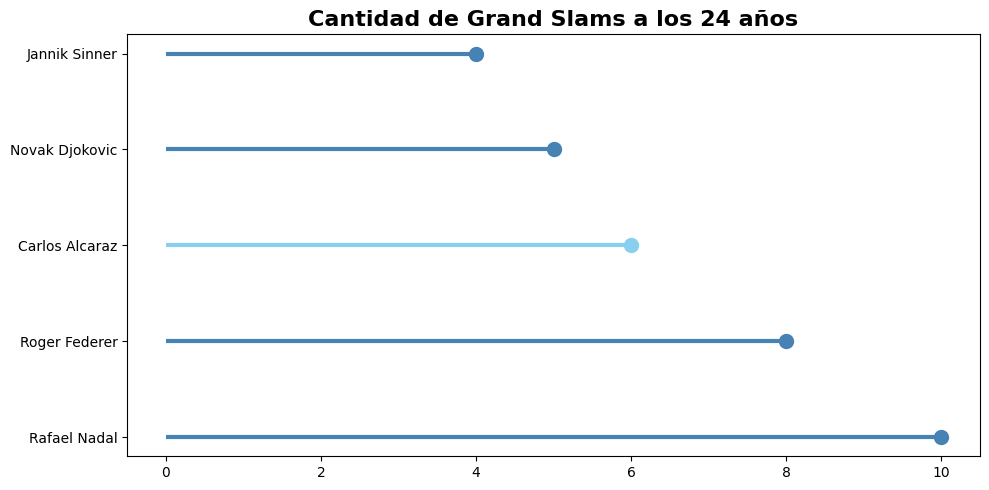

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for i, (nombre, valor) in enumerate(titulos_gs_fantasticos_ok.items()):
    color = '#89CFF0' if i == 2 else 'steelblue'
    
    plt.hlines(y=nombre, xmin=0, xmax=valor, color=color, linewidth=3)
    plt.plot(valor, nombre, "o", color=color, markersize=10)

plt.title('Cantidad de Grand Slams a los 24 años', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Carlos Alcaraz (2003) y Jannik Sinner (2001) están dominando la nueva era. Ya ganaron 10 GS entre los dos y el gráfico indica que van por buen camino. La posición de Alacaraz es aún más llamativa ya que tiene 22 años recién.